[Notebook original](https://github.com/Mjrovai/UNIFEI-IESTI01-TinyML-2021.2/blob/main/00_Curse_Folder/1_Fundamentals/Class_08)

**Grupo:**
- MATHEUS VYNICIUS SILVA JALES
- PAULO HENRIQUE ALMEIDA DE ANDRADE

# Classificação de dígitos usando rede neural densa (DNN)

**NOTA**: Confirme se o tipo de *Runtime* (ambiente de execução) está definido como: `GPU`

## Importar Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Carregar e explorar conjunto de dados
Conjunto de dados de dígitos manuscritos **MNIST**

O banco de dados MNIST de dígitos manuscritos, disponível nesta [página](http://yann.lecun.com/exdb/mnist/), possui um conjunto de treinamento de 60.000 imagens em escala de cinza 28x28 dos 10 dígitos ao longo de um conjunto de teste de 10.000 imagens. É um subconjunto de um conjunto maior disponível no NIST. Os dígitos foram normalizados em tamanho e centralizados em uma imagem de tamanho fixo.

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">


In [ ]:
data = tf.keras.datasets.mnist

(training_images, training_labels), (val_images, val_labels) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


### Explorando rótulos

In [ ]:
training_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

É possível manter os rótulos de treinamento como "números", mas neste caso ao compilar o modelo, você deve usar: `loss="sparse_categorical_crossentropy".`

**E que tal mudar os rótulos para categóricos?**

In [ ]:
training_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical
to_categorical(training_labels[:10])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Quando os rótulos são definidos como categóricos, ao compilar o modelo você deve usar: `loss="categorical_crossentropy".`

### Explorando imagens

In [ ]:
#indice da imagem de digito de exemplo
img = 2

In [ ]:
np.set_printoptions(linewidth=200)
print(training_images[img])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  2

In [ ]:
training_labels[img]

4

     Label of image 2 is: 4


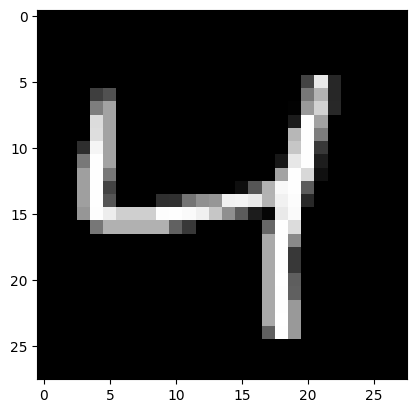

In [ ]:
print("     Label of image {} is: {}".format(img, training_labels[img]))
plt.imshow(training_images[img], cmap='gray');

In [ ]:
training_images.max()

255

In [ ]:
training_images.min()

0

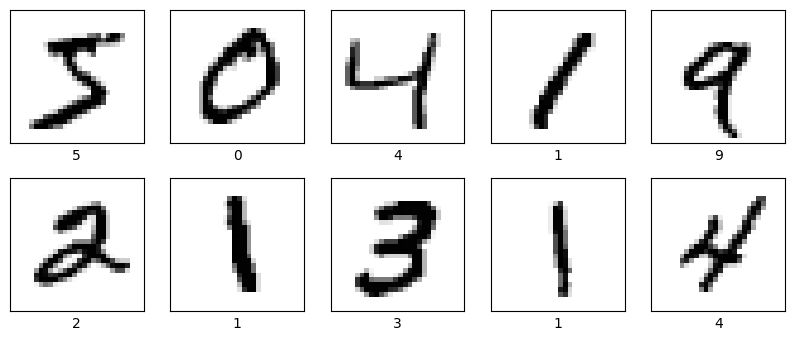

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap='binary') # cmap = 'gray'
    plt.xlabel(training_labels[i])

### Dados de pré-processamento

**Normalizando Dados**:
Notamos que todos os valores do número estão entre 0 e 255. Se estivermos treinando uma rede neural, por várias razões é mais fácil tratar todos os valores como entre 0 e 1, um processo chamado de 'normalização'.

In [ ]:
training_images  = training_images / 255.0
val_images = val_images / 255.0

In [ ]:
print(training_images[2])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

In [ ]:
training_images.max()

1.0

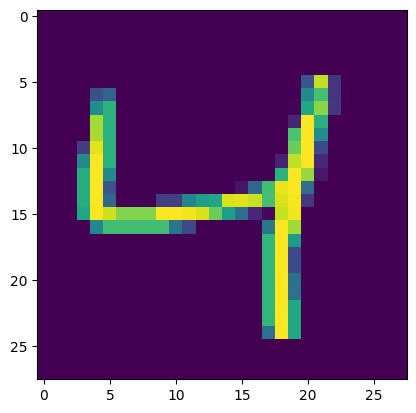

In [ ]:
plt.imshow(training_images[2]);

## Definir e compilar o modelo

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#os labels continuam numericos e não categóritcos, confira
training_labels[2]

4

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
    )

## Treine o modelo

In [ ]:
%%time
history = model.fit(
    training_images,
    training_labels,
    epochs=20,
    )

Epoch 1/20
1875/1875 [==============================] - 15s 6ms/step - loss: 0.3869 - accuracy: 0.8927
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2101 - accuracy: 0.9401
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1748 - accuracy: 0.9487
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1556 - accuracy: 0.9542
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1424 - accuracy: 0.9577
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1331 - accuracy: 0.9606
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1255 - accuracy: 0.9627
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1188 - accuracy: 0.9649
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1129 - accuracy: 0.9664
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.10

Inspecionando o modelo

In [ ]:
train_eval = model.evaluate(training_images, training_labels)
print ("Training data Accuracy: {:.1f}%".format(train_eval[1]*100))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9798
Training data Accuracy: 98.0%


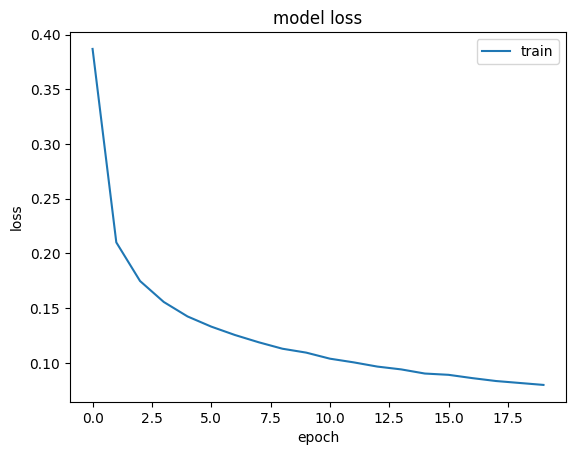

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

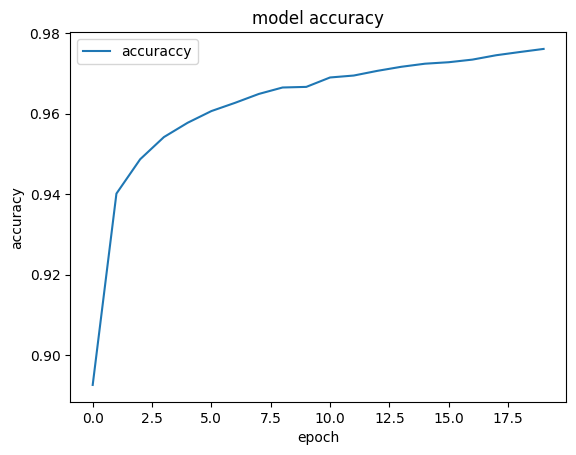

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Testando o modelo treinado

Usando `model.evaluate`, você pode obter métricas para um conjunto de teste. Neste caso temos apenas um conjunto de treinamento e um conjunto de validação, então podemos testar com o conjunto de validação. A precisão será um pouco menor, talvez 96%. Isso ocorre porque o modelo não viu esses dados anteriormente e pode não ser totalmente generalizado para todos os dados. Ainda assim, é uma pontuação muito boa.
Você também pode prever imagens e comparar com seu rótulo real. A imagem [0] no conjunto é um número 7, e aqui você pode ver que o neurônio 7 tem uma probabilidade de 9,9e-1 (99%+), então acertou!

In [ ]:
test_eval = model.evaluate(val_images, val_labels)
print ("Testing data Accuracy: {:.1f}%".format(test_eval[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1340 - accuracy: 0.9612
Testing data Accuracy: 96.1%


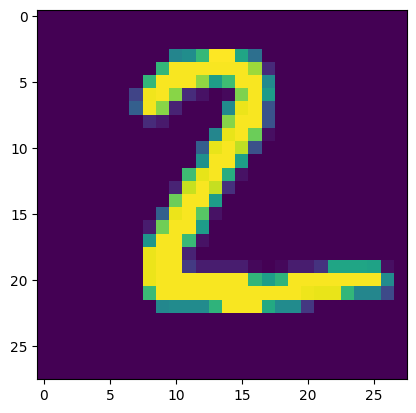

In [ ]:
plt.imshow(val_images[1]);

In [ ]:
print(val_labels[1])

2


In [ ]:
classifications = model.predict(val_images)
classifications.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [ ]:
classifications[1]

array([6.5903144e-08, 3.0579770e-07, 9.9987066e-01, 1.2816805e-04, 2.5440057e-21, 1.6095423e-09, 1.3689130e-07, 8.2657139e-19, 7.5832833e-07, 3.5055392e-17], dtype=float32)

In [ ]:
# Returns the indices of the maximum values along an axis.
np.argmax(classifications[1])

2

## Inspeção de erros

In [ ]:
predict_errors = []
for i in range(len(val_labels)):
  predicted_label = np.argmax(classifications[i])
  if predicted_label != val_labels[i]:
    predict_errors.append(i)

print(1-(len(predict_errors)/len(val_labels)))

0.9612


In [ ]:
predict_errors[:10]

[8, 61, 126, 149, 151, 217, 247, 259, 313, 321]

    Real label of image 8 is: 5
 Predict label of image 8 is: 8


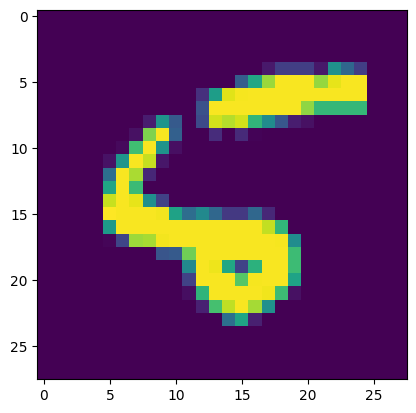

In [ ]:
i = predict_errors[0]
predicted_label = np.argmax(classifications[i])
print("    Real label of image {} is: {}".format(i, val_labels[i]))
print(" Predict label of image {} is: {}".format(i, predicted_label))
plt.imshow(val_images[i]);

## Modifique para inspecionar os valores aprendidos

Este código é idêntico, exceto que as camadas são nomeadas antes de serem adicionadas ao sequencial. Isso nos permite inspecionar seus parâmetros aprendidos posteriormente.

In [ ]:
layer_1 = tf.keras.layers.Dense(20, activation=tf.nn.relu)
layer_2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    layer_1,
                                    layer_2])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,
          training_labels,
          epochs=20,
          verbose=0
          )

test_eval = model.evaluate(val_images, val_labels)
print ("Testing data Accuracy: {:.1f}%".format(test_eval[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1482 - accuracy: 0.9603
Testing data Accuracy: 96.0%


In [ ]:
classifications = model.predict(val_images)
print(classifications[0])
print(np.argmax(classifications[0]))
print(val_labels[0])

313/313 [==============================] - 0s 1ms/step
[1.3755844e-10 2.6799698e-11 7.3809970e-06 2.2383867e-04 2.7062272e-12 1.5137767e-08 8.4144609e-18 9.9976534e-01 3.3820811e-06 6.4676897e-08]
7
7


Inspecionar Camada 1

In [ ]:
print("Layer 1 Ws ==>", layer_1.get_weights()[0].size)
print("Layer 1 bs ==>", layer_1.get_weights()[1].size)

Layer 1 Ws ==> 15680
Layer 1 bs ==> 20


O `get_weights()[0]` contém os pesos (Ws). Por que temos 15.680 w's na camada 1? Lembre-se de que há 20 neurônios na primeira camada e que as imagens têm 28x28 pixels, o que dá 784. Portanto, se você multiplicar 784 x 20, obtém 15.680.

Essa camada possui 20 neurônios, e cada neurônio aprende um parâmetro W para cada pixel. Então, em vez de y=Mx+c, temos
y=M1X1+M2X2+M3X3+....+M784X784+C em cada neurônio! Cada pixel tem um peso em cada neurônio. Esses pesos são multiplicados pelo valor do pixel, somados ao viés (*bias*) dado.

O `get_weights()[1]` contém os bias (bs), um para cada um dos 20 neurônios nesta camada.

Inspecionar Camada 2

In [ ]:
print("Layer 2 Ws ==>", layer_2.get_weights()[0].size)
print("Layer 2 bs ==>", layer_2.get_weights()[1].size)

Layer 2 Ws ==> 200
Layer 2 bs ==> 10


A camada 2 tem 200 Ws. Isso ocorre porque são 10 neurônios nesta camada, mas existem 20 neurônios na camada anterior. Assim, cada neurônio nesta camada aprenderá um peso para o valor recebido da camada anterior. Então, por exemplo, se o primeiro neurônio nesta camada for N21, e a saída dos neurônios das camadas anteriores for N11-N120, então este neurônio terá 20 pesos (W1-W20) e calculará sua saída como sendo:

`W1N11+W2N12+W3N13+...+W20N120+Bias`

Portanto, cada um desses pesos será aprendido, assim como o viés, para cada neurônio.

Observe que N11 se refere ao Neurônio 1 da Camada 1.

...e como esperado, existem 10 elementos na segunda matriz, representando os 10 bias para os 10 neurônios.
Espero que isso ajude você a ver como o elemento de um neurônio simples contendo y=mx+c pode ser amplamente expandido em uma rede neural profunda e que a DNN pode aprender os parâmetros que correspondem aos 784 pixels de uma imagem com sua saída!

# Questão 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data = tf.keras.datasets.mnist

(training_images, training_labels), (val_images, val_labels) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
training_images  = training_images / 255.0
val_images = val_images / 255.0

## Modelo Alpha 10 Relu

In [ ]:
modelAlpha10Relu = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
modelAlpha10Relu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelAlpha10Relu.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
)

In [ ]:
%%time
historyAlpha10Relu = modelAlpha10Relu.fit(
    training_images,
    training_labels,
    epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5769 - accuracy: 0.8271
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2935 - accuracy: 0.9178
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9267
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2385 - accuracy: 0.9331
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2266 - accuracy: 0.9357
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2175 - accuracy: 0.9377
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2111 - accuracy: 0.9394
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2060 - accuracy: 0.9411
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2007 - accuracy: 0.9427
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.196

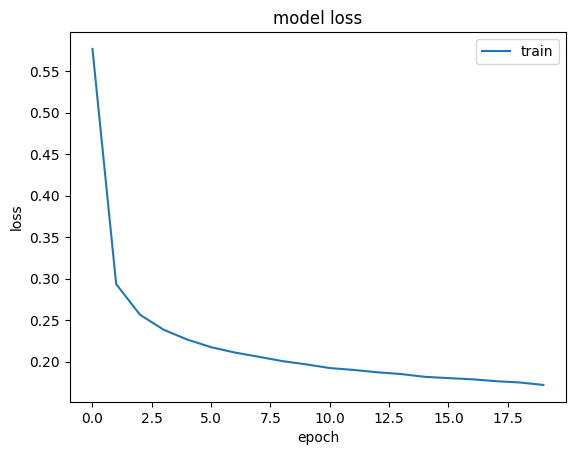

In [ ]:
plt.plot(historyAlpha10Relu.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

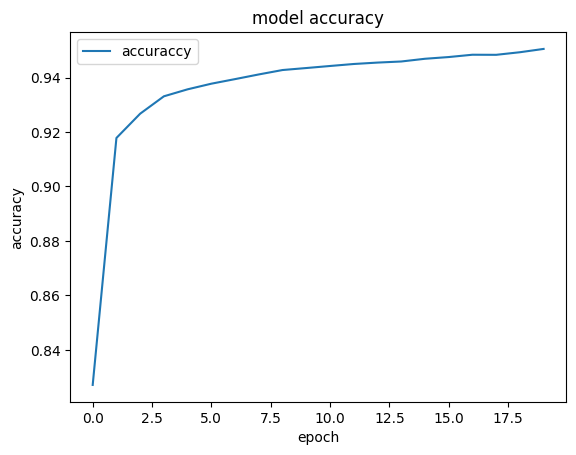

In [ ]:
plt.plot(historyAlpha10Relu.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Modelo Alpha 10 Tanh

In [ ]:
modelAlpha10Tanh = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
modelAlpha10Tanh.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelAlpha10Tanh.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
)

In [ ]:
%%time
historyAlpha10Tanh = modelAlpha10Tanh.fit(
    training_images,
    training_labels,
    epochs=20,
    verbose=0)

CPU times: user 1min 30s, sys: 4.99 s, total: 1min 35s
Wall time: 1min 21s


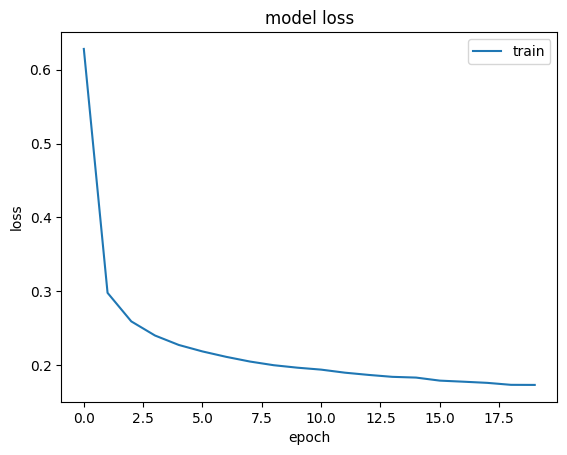

In [ ]:
plt.plot(historyAlpha10Tanh.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

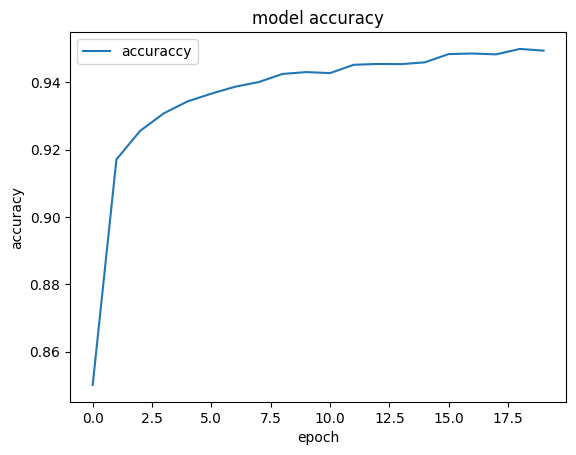

In [ ]:
plt.plot(historyAlpha10Tanh.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Modelo Alpha 20

In [ ]:
modelAlpha20 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
modelAlpha20.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 20)                15700     
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
Total params: 16330 (63.79 KB)
Trainable params: 16330 (63.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelAlpha20.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
)

In [ ]:
%%time
historyAlpha20 = modelAlpha20.fit(
    training_images,
    training_labels,
    epochs=20,
    verbose=0)

CPU times: user 1min 32s, sys: 4.66 s, total: 1min 37s
Wall time: 1min 22s


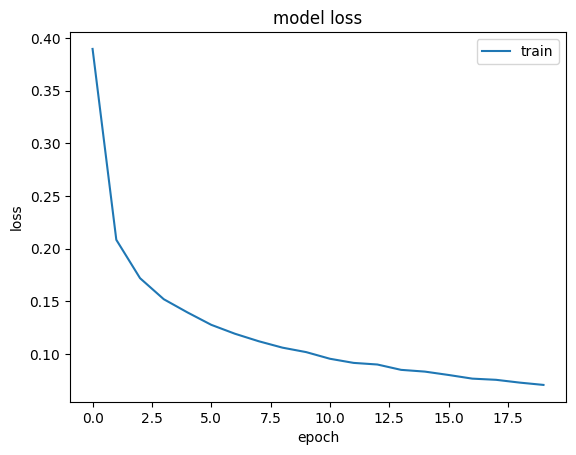

In [ ]:
plt.plot(historyAlpha20.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

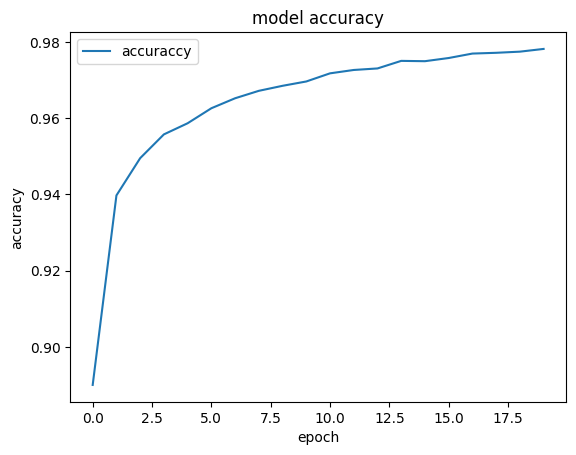

In [ ]:
plt.plot(historyAlpha20.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Modelo Alpha 30

In [ ]:
modelAlpha30 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
modelAlpha30.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 30)                23550     
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
Total params: 24790 (96.84 KB)
Trainable params: 24790 (96.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelAlpha30.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
)

In [ ]:
%%time
historyAlpha30 = modelAlpha30.fit(
    training_images,
    training_labels,
    epochs=20,
    verbose=0)

CPU times: user 1min 32s, sys: 4.69 s, total: 1min 37s
Wall time: 1min 23s


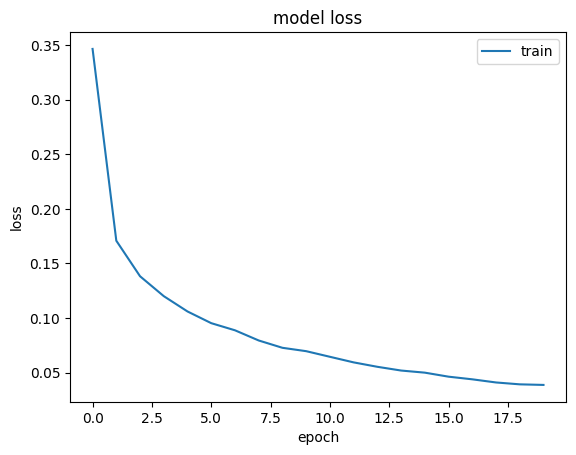

In [ ]:
plt.plot(historyAlpha30.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

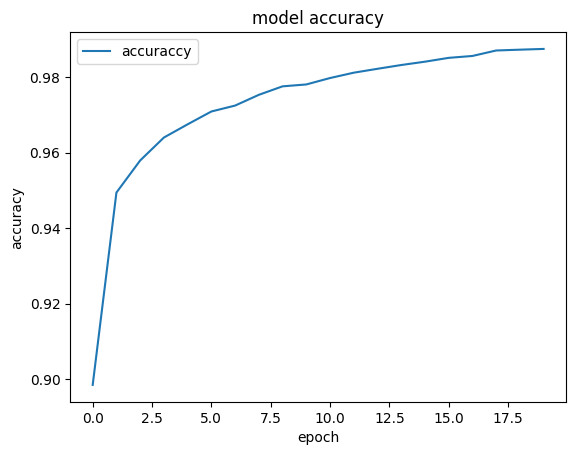

In [ ]:
plt.plot(historyAlpha30.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Modelo Bravo 10 Relu

In [ ]:
modelBravo10Relu = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
modelBravo10Relu.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
Total params: 8180 (31.95 KB)
Trainable params: 8180 (31.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelBravo10Relu.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
)

In [ ]:
%%time
historyBravo10Relu = modelBravo10Relu.fit(
    training_images,
    training_labels,
    epochs=20,
    verbose=0)

CPU times: user 1min 38s, sys: 6.04 s, total: 1min 44s
Wall time: 2min 23s


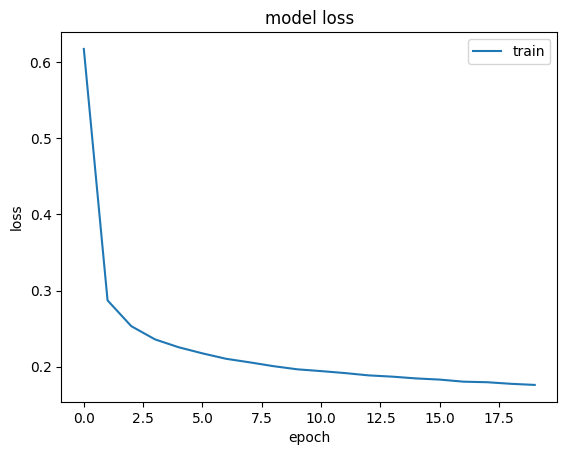

In [ ]:
plt.plot(historyBravo10Relu.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

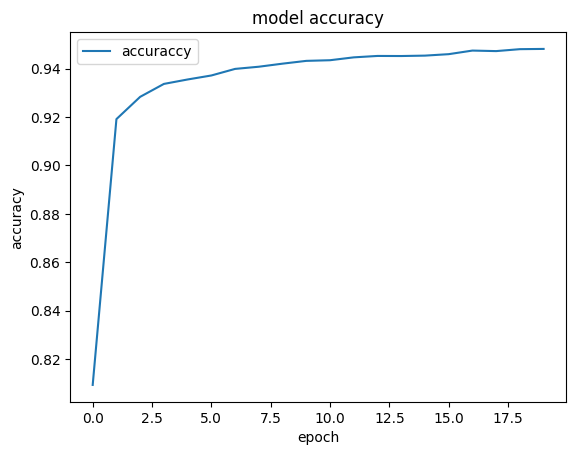

In [ ]:
plt.plot(historyBravo10Relu.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Modelo Bravo 10 Tanh

In [ ]:
modelBravo10Tanh = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
modelBravo10Tanh.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
Total params: 8180 (31.95 KB)
Trainable params: 8180 (31.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelBravo10Tanh.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
)

In [ ]:
%%time
historyBravo10Tanh = modelBravo10Tanh.fit(
    training_images,
    training_labels,
    epochs=20,
    verbose=0)

CPU times: user 1min 38s, sys: 5.89 s, total: 1min 44s
Wall time: 2min 23s


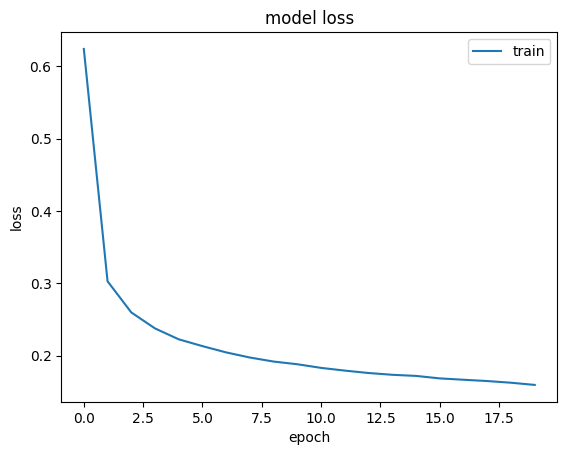

In [ ]:
plt.plot(historyBravo10Tanh.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

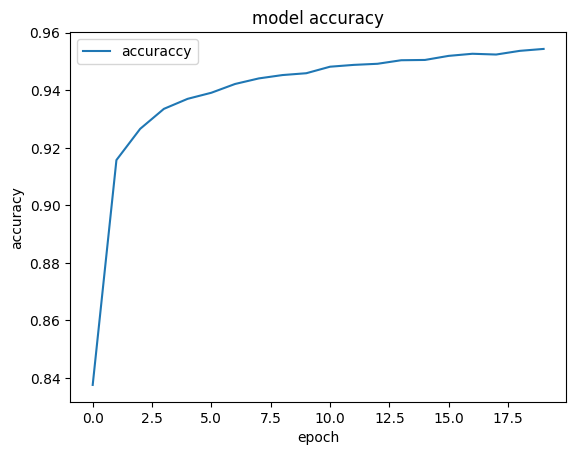

In [ ]:
plt.plot(historyBravo10Tanh.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Modelo Bravo 20

In [ ]:
modelBravo20 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
modelBravo20.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 20)                15700     
                                                                 
 dense_21 (Dense)            (None, 20)                420       
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dense_23 (Dense)            (None, 10)                210       
                                                                 
Total params: 16750 (65.43 KB)
Trainable params: 16750 (65.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelBravo20.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
)

In [ ]:
%%time
historyBravo20 = modelBravo20.fit(
    training_images,
    training_labels,
    epochs=20,
    verbose=0)

CPU times: user 1min 39s, sys: 5.68 s, total: 1min 44s
Wall time: 1min 31s


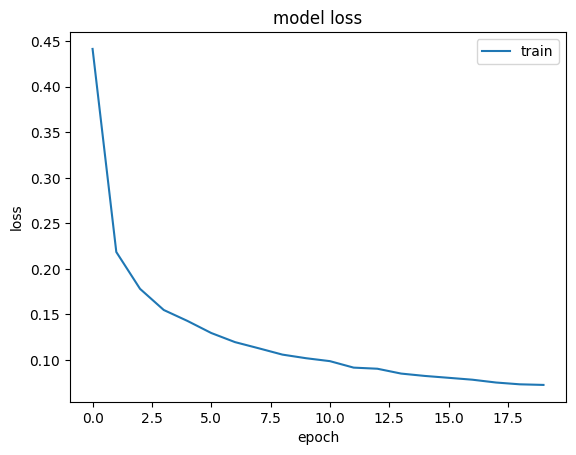

In [ ]:
plt.plot(historyBravo20.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

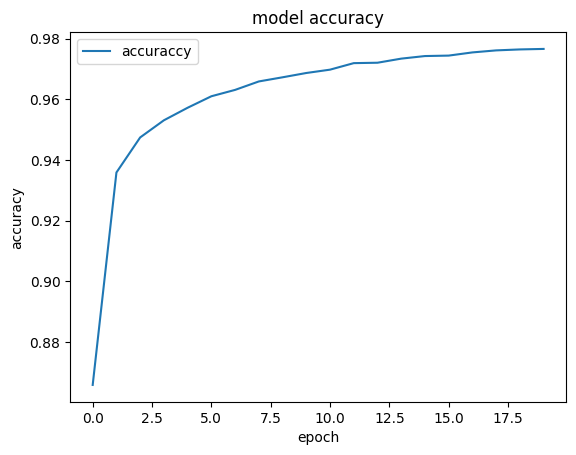

In [ ]:
plt.plot(historyBravo20.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Modelo Bravo 30

In [ ]:
modelBravo30 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
modelBravo30.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 30)                23550     
                                                                 
 dense_25 (Dense)            (None, 30)                930       
                                                                 
 dense_26 (Dense)            (None, 30)                930       
                                                                 
 dense_27 (Dense)            (None, 10)                310       
                                                                 
Total params: 25720 (100.47 KB)
Trainable params: 25720 (100.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelBravo30.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
)

In [ ]:
%%time
historyBravo30 = modelBravo30.fit(
    training_images,
    training_labels,
    epochs=20,
    verbose=0)

CPU times: user 1min 39s, sys: 5.92 s, total: 1min 45s
Wall time: 2min 23s


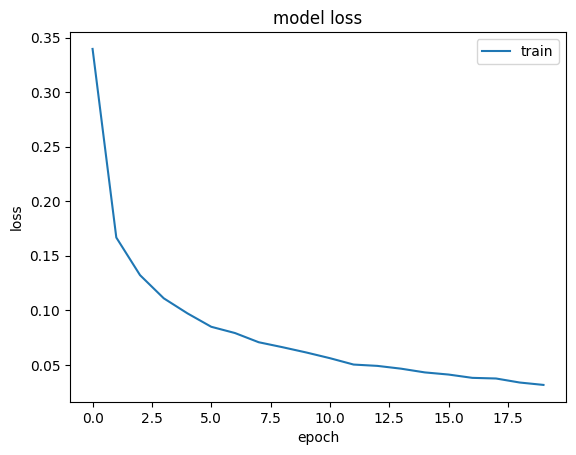

In [ ]:
plt.plot(historyBravo30.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

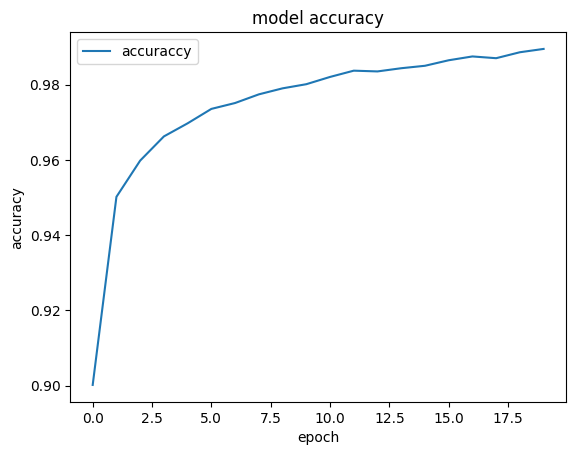

In [ ]:
plt.plot(historyBravo30.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Gráficos e comparações

Modelos Alpha (2 hidden layers)

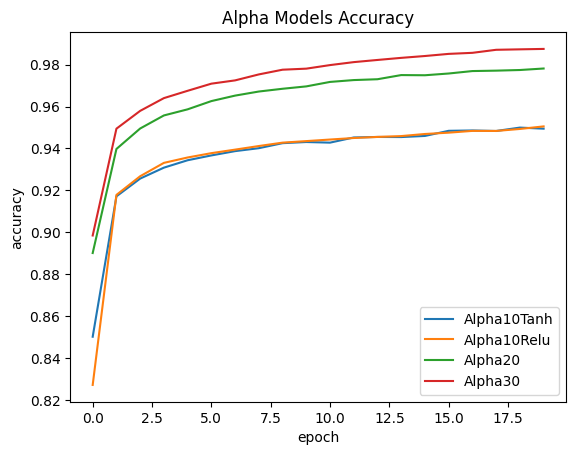

In [ ]:
plt.plot(historyAlpha10Tanh.history['accuracy'])
plt.plot(historyAlpha10Relu.history['accuracy'])
plt.plot(historyAlpha20.history['accuracy'])
plt.plot(historyAlpha30.history['accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Alpha Models Accuracy')
plt.legend(['Alpha10Tanh', 'Alpha10Relu', 'Alpha20', 'Alpha30'])

plt.show()

Modelos Bravo (3 hidden layers)

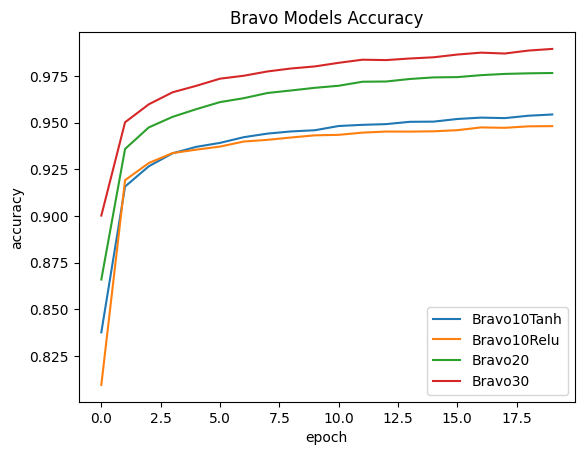

In [ ]:
plt.plot(historyBravo10Tanh.history['accuracy'])
plt.plot(historyBravo10Relu.history['accuracy'])
plt.plot(historyBravo20.history['accuracy'])
plt.plot(historyBravo30.history['accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Bravo Models Accuracy')
plt.legend(['Bravo10Tanh', 'Bravo10Relu', 'Bravo20', 'Bravo30'])

plt.show()

Comparativo dos valores máximo para os melhores modelos Alpha e Bravo

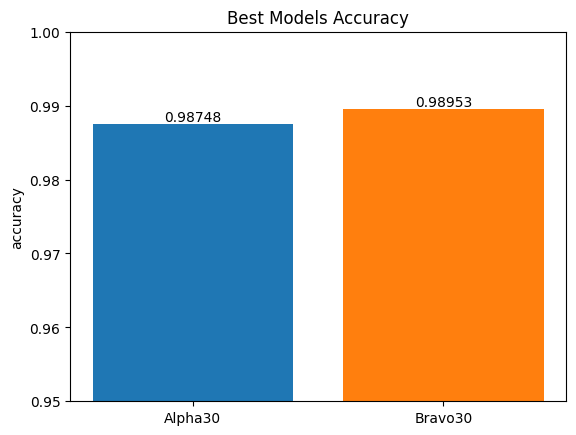

In [ ]:
alpha30_accuracy = max(historyAlpha30.history['accuracy'])
bravo30_accuracy = max(historyBravo30.history['accuracy'])

fig, ax = plt.subplots()

ax.bar('Alpha30', alpha30_accuracy)
ax.text('Alpha30', alpha30_accuracy, f'{alpha30_accuracy:.5f}', ha='center', va='bottom')

ax.bar('Bravo30', bravo30_accuracy)
ax.text('Bravo30', bravo30_accuracy, f'{bravo30_accuracy:.5f}', ha='center', va='bottom')

ax.set_ylim(0.95, 1.0)

plt.title('Best Models Accuracy')
plt.ylabel('accuracy')

plt.show()

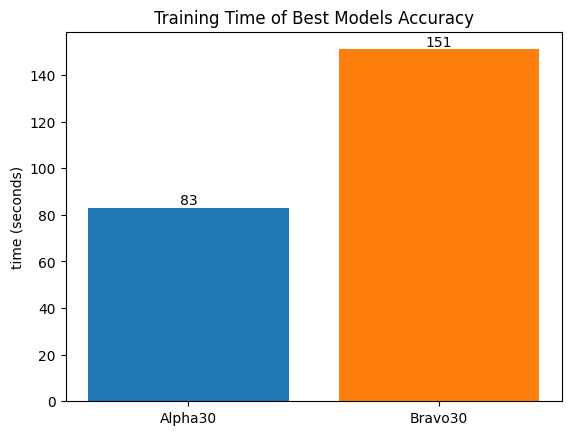

In [ ]:
fig, ax = plt.subplots()

Alpha30Time = (1 * 60 + 23)
Bravo30Time = (2 * 60 + 31)

ax.bar('Alpha30', Alpha30Time)
ax.text('Alpha30', Alpha30Time, f'{Alpha30Time}', ha='center', va='bottom')

ax.bar('Bravo30', Bravo30Time)
ax.text('Bravo30', Bravo30Time, f'{Bravo30Time}', ha='center', va='bottom')

plt.title('Training Time of Best Models Accuracy')
plt.ylabel('time (seconds)')

plt.show()

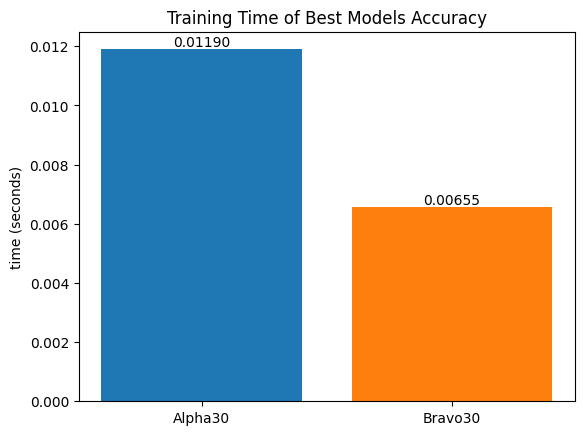

In [ ]:
fig, ax = plt.subplots()

alpha30_accuracy_per_second = alpha30_accuracy / Alpha30Time
bravo30_accuracy_per_second = bravo30_accuracy / Bravo30Time

ax.bar('Alpha30', alpha30_accuracy_per_second)
ax.text('Alpha30', alpha30_accuracy_per_second, f'{alpha30_accuracy_per_second:.5f}', ha='center', va='bottom')

ax.bar('Bravo30', bravo30_accuracy_per_second)
ax.text('Bravo30', bravo30_accuracy_per_second, f'{bravo30_accuracy_per_second:.5f}', ha='center', va='bottom')

plt.title('Time Efficiency of Best Models Accuracy')
plt.ylabel('time (seconds)')

plt.show()

## Conclusão

Os gráficos de acuracidade mostram uma proximidade muito grande entre as variantes dos modelos Alpha e Bravo. Da mesma forma, os modelos que diferiram entre os *activations* **Relu** e **Tanh** não se mostraram muito longe um dos outros em suas precisões.

Entretando, o critério de *quantidade de neurônios*, para essa análise, se mostrou muito relevante, gerando ganhos de quase 5% na acuracidade. Essa melhoria aconteceu em ambas as arquiteturas (Alpha e Bravo) ao ponto de que não se observar muita diferença de precisão entre os melhores modelos (Alpha30 e Bravo30).

Como última observação, os modelos Alpha30 e Bravo30 mostraram uma relevante distinção no seu tempo de treinamento, chegando a uma diferença de 1min e 8s nos últimos testes feitos. Nas análises gráficas também é possível notar que a eficiência de tempo dos modelos se distinguem, favorecendo o Alpha30 por garantir uma acuracidade muito semelhante em um espaço de tempo bem menor.